<a href="https://colab.research.google.com/github/edotheepic/ComVis/blob/main/2440007226_ASSIGNMENT_GSLC_01_COMP7116001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Eduardo Brilliandy

NIM : 2440007226

# Harris Corner Detection

###Import Libraries & Image

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/image9.jpg

--2022-11-04 09:52:27--  https://raw.githubusercontent.com/edotheepic/ComVis/main/image9.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7045 (6.9K) [image/jpeg]
Saving to: ‘image9.jpg’

image9.jpg          100%[===================>]   6.88K  --.-KB/s    in 0s      

2022-11-04 09:52:27 (56.8 MB/s) - ‘image9.jpg’ saved [7045/7045]



### Read Image and Convert to Grayscale

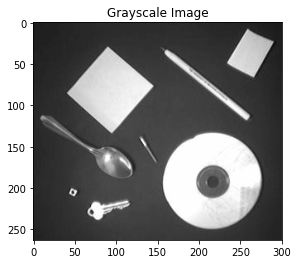

In [2]:
#read image
I = cv.imread('image9.jpg')

#convert to graycale
I_gray = cv.cvtColor(I, cv.COLOR_BGR2GRAY)
I_gray = np.float64(I_gray)

#show image
plt.imshow(I_gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

### 1. Compute Gaussian derivatives at each pixel

Calculate each of the derivative for both x & y axis

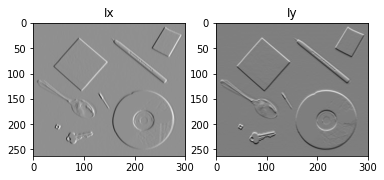

In [3]:
#declare x & y kernels
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float64)
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float64)

#calculate derivative at each pixel
Ix = nd.filters.convolve(I_gray, Kx)
Iy = nd.filters.convolve(I_gray, Ky)

#show image derivatives
plt.subplot(1, 2, 1)
plt.imshow(Ix, cmap='gray')
plt.title('Ix')

plt.subplot(1, 2, 2)
plt.imshow(Iy, cmap='gray')
plt.title('Iy')

plt.show()

### 2. Compute second moment matrix M in a Gaussian window around each pixel

Gaussian filter uses 3x3 kernel size and sigma value of 1.4

This step calculates the square values of the derivatives and then applies a gaussian filter to the square values.

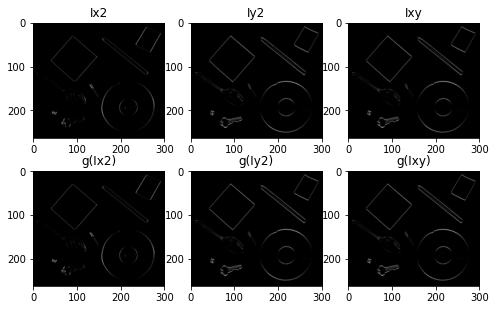

In [4]:
#calculate variables for second moment matrix
Ix2 = np.square(Ix)
Iy2 = np.square(Iy)
Ixy = np.multiply(Ix, Iy)

#apply gaussian filter
Ix2_g = cv.GaussianBlur(Ix2, (3, 3), 1.4)
Iy2_g = cv.GaussianBlur(Iy2, (3, 3), 1.4)
Ixy_g = cv.GaussianBlur(Ixy, (3, 3), 1.4)

#show second moment matrix M
plt.figure(figsize=(8,5))
plt.subplot(2, 3, 1)
plt.imshow(Ix2, cmap='gray')
plt.title('Ix2')

plt.subplot(2, 3, 2)
plt.imshow(Iy2, cmap='gray')
plt.title('Iy2')

plt.subplot(2, 3, 3)
plt.imshow(Iy2, cmap='gray')
plt.title('Ixy')

plt.subplot(2, 3, 4)
plt.imshow(Ix2, cmap='gray')
plt.title('g(Ix2)')

plt.subplot(2, 3, 5)
plt.imshow(Iy2, cmap='gray')
plt.title('g(Iy2)')

plt.subplot(2, 3, 6)
plt.imshow(Iy2, cmap='gray')
plt.title('g(Ixy)')

plt.show()

### 3. Compute corner response function R

alpha value used is 0.04

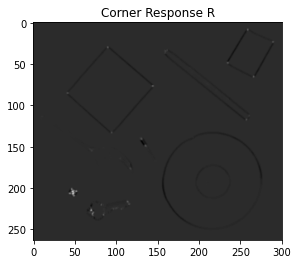

In [5]:
#calculate corner response
alpha = 0.04
R = Ix2_g * Iy2_g - np.square(Ixy_g) - alpha * np.square(Ix2_g + Iy2_g)

#show corner response R
plt.imshow(R, cmap='gray')
plt.title('Corner Response R')
plt.show()

### 4. Threshold R

The threshold is 1% of the max value of R, any value below the threshold is converted to 0

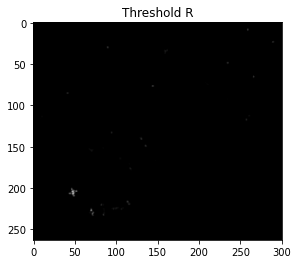

In [6]:
w, h = R.shape
R_thresh = np.zeros((w, h), np.float64)

#set threshold
thresh = 0.01 * R.max()

#threshold corner response R
for i in range(w):
  for j in range(h):
    if R[i][j] > thresh:
      R_thresh[i][j] = R[i][j]

#show threshold result
plt.imshow(R_thresh, cmap='gray')
plt.title("Threshold R")
plt.show()

### 5. Find local maxima of response function (non-maximum suppression)

To find local maxima, each pixel is tested and compared with other pixels in a 3x3 grid centered at the current pixel. If there is a value that is higher than the current pixel, the current pixel is not the local maxima and is suppressed (converted to 0)

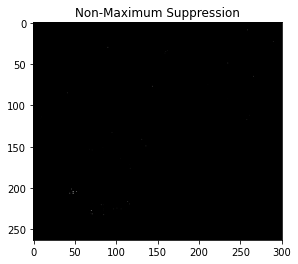

In [7]:
R_NMS = R_thresh.copy()

#perform non-maxima suppression
for i in range(w):
  for j in range(h):
    if R_thresh[i][j] != 0:
      #loop through the 3x3 neighborhood of the pixel
      for k in range(i-1, i+2):
        for l in range(j-1, j+2):
          if k >= 0 and k < w and l >= 0 and l < h:
            if R_thresh[i][j] < R_thresh[k][l]:
              R_NMS[i][j] = 0
              break

#show NMS result
plt.imshow(R_NMS, cmap='gray')
plt.title("Non-Maximum Suppression")
plt.show()

### Draw Harris Corner Detection Result on Original Image

each keypoint is drawn as a small blue circle

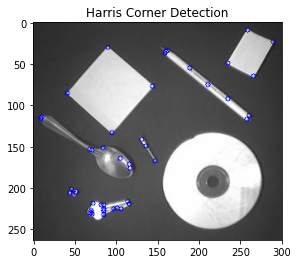

In [8]:
I_res = I.copy()

#draw keypoints to image
for i in range(w):
  for j in range(h):
    if R_NMS[i][j] != 0:
      cv.circle(I_res, (j, i), 3, [0, 0, 255], 1)

#show final result
plt.imshow(I_res)
plt.title("Harris Corner Detection")
plt.show()